In [3]:
import numpy as np
import matplotlib.pyplot as plt

from FF.image_processing import thresh
from FF.image_processing import prepare_scalemap
from FF.image_processing import edgedetector
from FF.image_processing import measure_D

from FF.fractal_generation import midpoint_displacement
from FF.fractal_generation import mountainpro
from FF.fractal_generation import mountainpro_enhanced

from FF.fractal_generation import batch_generate_fractals

def plot_image(image):
    plt.figure(figsize=(11, 11))
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Removes the axis labels and ticks
    plt.show()


D-value: 1.410


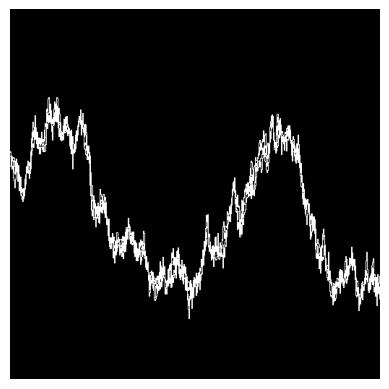

In [18]:
iterations = 9
D = 1.5
P = 1
zslice = 0.5

meshmap = midpoint_displacement(iterations, P = P, D=D)
scalemap = prepare_scalemap(meshmap)
threshmap, bwratio = thresh(scalemap, iterations)

coastline = edgedetector(threshmap, iterations)

slice, trace = mountainpro_enhanced(scalemap, iterations, zslice, num_slices=4, random_slices=False)
plt.imshow(trace, 'gray')
plt.axis('off')

min_size=8 
max_size=max(trace.shape) // 10 
num_sizes=50

measure_D(trace, min_size = min_size, max_size=max_size, n_sizes = num_sizes, plot_image=False, invert=False);



In [10]:
# Example usage
batch_generate_fractals(
    num_fractals=100,
    iterations=9,
    D_range=(1.2, 1.8),
    P=1,
    fractal_type = 'coastline edge',
    output_dir=r'/home/apd/Projects/FractalFluency/datasets/coastline_edge_test'
)

Generating Fractals:   0%|          | 0/100 [00:00<?, ?fractal/s]

Generating Fractals: 100%|██████████| 100/100 [01:04<00:00,  1.56fractal/s]

Batch generation complete. 100 fractals saved to /home/apd/Projects/FractalFluency/datasets/coastline_edge_test.
Labels saved to /home/apd/Projects/FractalFluency/datasets/coastline_edge_test/labels.csv.


D-value: 1.511


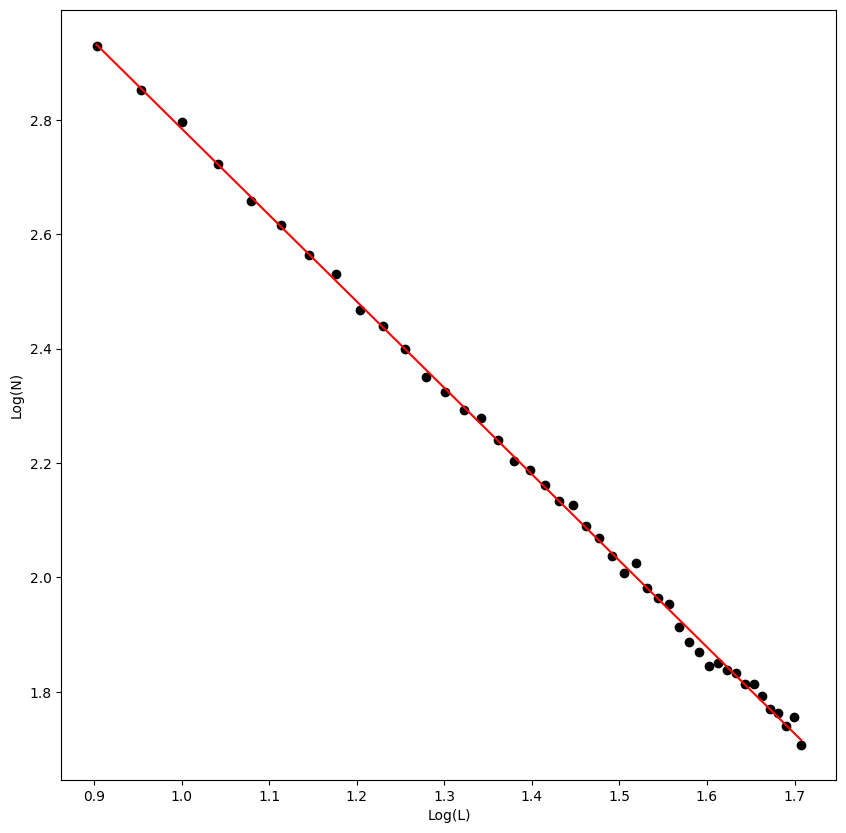

In [31]:
min_size=8 
max_size=max(trace.shape) // 10 
num_sizes=50

measure_D(trace, min_size = min_size, max_size=max_size, n_sizes = num_sizes, invert=False);


#save_path = r'C:\Users\absolute-zero\Desktop'
#fname = r'test_coastline_BW'
#box_counter.save_as_tif(threshmap, save_path, fname)

In [1]:
from NNIS import network, neuron, soma, dendrite
from NNIS.data_processing import generate_network

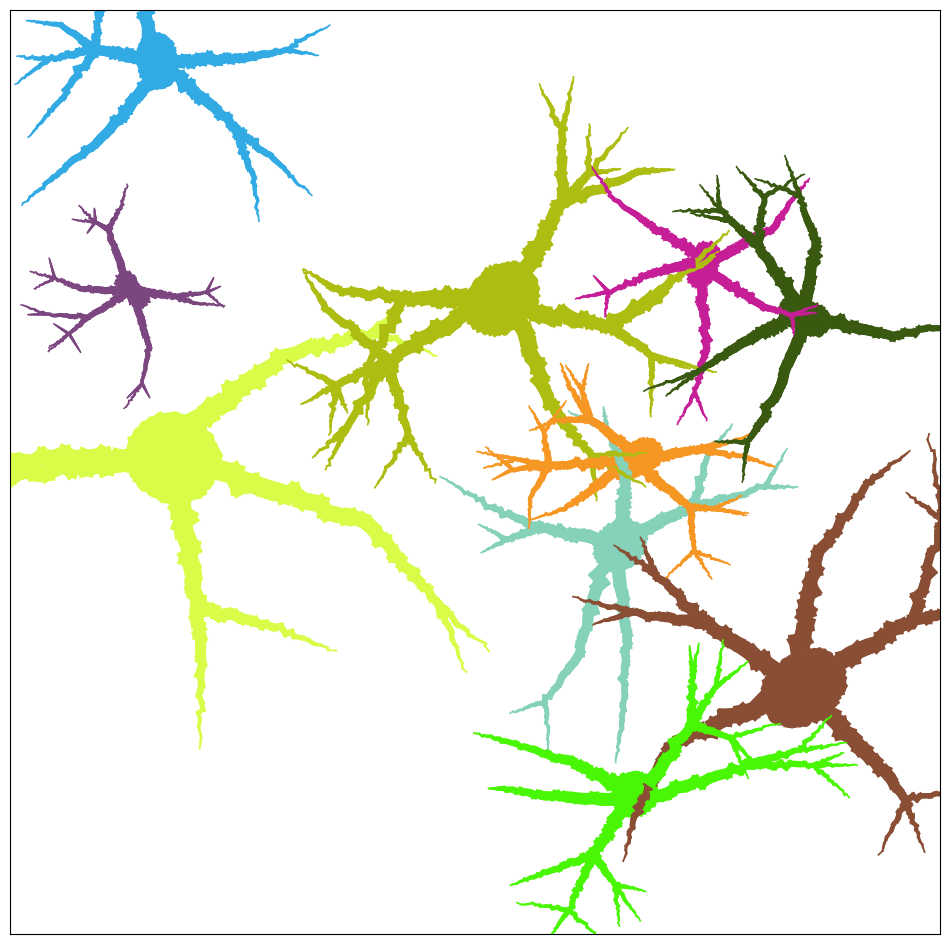

In [8]:
neuron_params = {
    'depth': 3,
    'mean_soma_radius': 60,
    'std_soma_radius': 15,
    'D': 1.5,
    'branch_angle': np.pi / 4,
    'mean_branches': 1.5,
    'weave_type': 'Gauss',
    'randomness': 0.2,
    'curviness': 'Gauss',
    'curviness_magnitude': 1.5,
    'n_primary_dendrites': 5,
}

network_params = {
    'width': 2048,
    'height': 2048,
    'num_neurons': 10,
}

testnet = generate_network(network_id = 'nntest', neuron_params=neuron_params, network_params=network_params )

testnet.draw()